# 1.DATA PREPROCESSING

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
PLT_FIG_WIDTH = 7
PLT_FIG_HEIGHT = 3
import seaborn as sn


## Define the columns needed from the dataset. 

In [2]:
cols=[6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,38,39]

## Read the excel file.

In [3]:
initial_df=pd.read_excel('CTG.xls', sheet_name=2,usecols=cols)

In [4]:
initial_df.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0


In [5]:
initial_df.keys() # display all the column names

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'CLASS', 'NSP'],
      dtype='object')

In [6]:
len(initial_df) #the initial lenght of the dataset.

2130

In [7]:
initial_df.shape[1]#number of columns(dimensions) of the original dataset.

23

In [8]:
initial_df['Mean'].isnull().sum()#the number of rows where Mean is null

4

In [9]:
print("The the number of rows where DP is NOT 0:",(initial_df['DP'] != 0.0).sum())#the number of rows where DP is NOT 0
print("The the percentage of rows where DP is NOT 0:",((initial_df['DP'] != 0.0).sum()/len(initial_df))*100)# the percentage of rows where DP is NOT 0

The the number of rows where DP is NOT 0: 181
The the percentage of rows where DP is NOT 0: 8.497652582159624


In [10]:
print("The the number of rows where DS is NOT 0:",(initial_df['DS'] != 0.0).sum())#the number of rows where DS is NOT 0
print("The the percentage of rows where DS is NOT 0:",((initial_df['DS'] != 0.0).sum()/len(initial_df))*100)# the percentage of rows where DS is NOT 0

The the number of rows where DS is NOT 0: 10
The the percentage of rows where DS is NOT 0: 0.4694835680751174


## A.Preprocessing Function

In [136]:
def data_preprocessing(df):
    df=df.drop_duplicates() #drop duplicates.
    mean_of_Mean=df['Mean'].mean()#find mean of the Mean column
    df.Mean.fillna(mean_of_Mean)# Fill the NaN values of the Mean column with its mean.
    df=df.dropna() #drop every row where at least one column is null
    #df.to_csv('./GTC_clean.csv', header=True, index=False ,sep=';') #save the cleansed data in a csv file.
    df=df.loc[df.Mean< mean_of_Mean+20] #keep the rows that the Mean is lower than the overall mean plus 20(considering it is an outlier).
    df=df.loc[df.Variance<50] #keep the rows where the varience is  lower than 50 (considering it is an outlier).
    df=df.loc[df.Tendency<1] #keep the rows where tendency is less than 1.
    df=df.drop(columns=['DS','DP']) #drop column DS,DP since they appear MOSTLY the 0 value.
    df=df.sample(frac=0.5)#sample  and keep 50% of the data 
    return df
    
    

In [137]:
new_df=data_preprocessing(initial_df) #get the cleansed and reduced in both row size and dimensions(features) dataset.

In [138]:
new_df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,Width,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
1332,128.0,5.0,6.0,2.0,30.0,1.9,0.0,3.8,3.0,141.0,...,198.0,12.0,0.0,137.0,127.0,136.0,49.0,0.0,6.0,1.0
1991,135.0,5.0,0.0,1.0,58.0,1.1,0.0,4.3,0.0,53.0,...,164.0,3.0,0.0,141.0,143.0,145.0,8.0,0.0,2.0,1.0
282,118.0,3.0,0.0,6.0,41.0,2.5,0.0,5.8,2.0,119.0,...,171.0,6.0,0.0,123.0,122.0,124.0,19.0,0.0,2.0,1.0
1182,126.0,4.0,0.0,4.0,30.0,1.2,0.0,4.2,0.0,49.0,...,156.0,3.0,0.0,127.0,134.0,134.0,11.0,0.0,2.0,1.0
356,140.0,0.0,4.0,0.0,61.0,0.9,16.0,12.4,3.0,129.0,...,193.0,9.0,1.0,142.0,138.0,141.0,11.0,0.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,122.0,1.0,0.0,4.0,28.0,1.4,0.0,8.5,3.0,52.0,...,141.0,3.0,0.0,125.0,120.0,123.0,9.0,0.0,7.0,1.0
1053,127.0,4.0,0.0,4.0,34.0,1.0,0.0,6.1,0.0,54.0,...,168.0,1.0,0.0,131.0,136.0,134.0,15.0,-1.0,2.0,1.0
1468,148.0,5.0,0.0,6.0,27.0,1.5,8.0,13.0,0.0,50.0,...,179.0,3.0,0.0,157.0,154.0,157.0,6.0,0.0,2.0,1.0
1504,130.0,1.0,0.0,4.0,51.0,0.6,38.0,4.8,0.0,23.0,...,148.0,1.0,0.0,134.0,135.0,136.0,1.0,0.0,1.0,1.0


In [139]:
new_df['Mean'].isnull().sum()

0

## Understanding the dataset. 

### Create histogram displaying the amount of rows assigned to the NSP groups (1,2,3) 

### Counting the number of rows assigned to each nsp group.

In [145]:

nsp_hist=new_df.groupby('NSP').count()
nsp_hist=nsp_hist.iloc[:,0]

In [146]:
nsp_hist

NSP
1.0    424
2.0     66
3.0     35
Name: LB, dtype: int64

## Display the results with a histogram. 

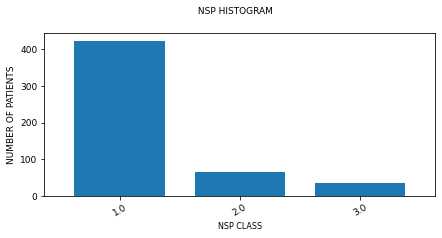

In [147]:
nsp_hist.plot.bar(cmap='tab20', figsize=(PLT_FIG_WIDTH,PLT_FIG_HEIGHT), fontsize=9, width=0.75, legend=False, rot=30)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,10))
plt.suptitle(r' NSP HISTOGRAM', fontsize=9, y=1)
plt.xlabel(r'NSP CLASS', fontsize=8)
plt.ylabel(r'NUMBER OF PATIENTS', fontsize=9)
plt.savefig('./max_nsp_histogram.png')

## Repeat the process for the class feature. 

In [148]:
class_hist=new_df.groupby('CLASS').count()
class_hist=class_hist.iloc[:,0]

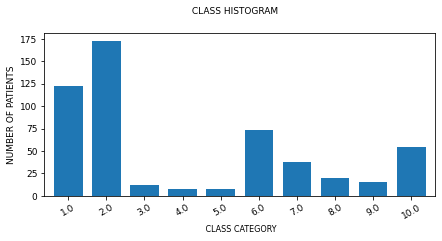

In [149]:
class_hist.plot.bar(cmap='tab20', figsize=(PLT_FIG_WIDTH,PLT_FIG_HEIGHT), fontsize=9, width=0.75, legend=False, rot=30)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,10))
plt.suptitle(r' CLASS HISTOGRAM', fontsize=9, y=1)
plt.xlabel(r' CLASS CATEGORY', fontsize=8)
plt.ylabel(r'NUMBER OF PATIENTS', fontsize=9)
plt.savefig('./max_class_histogram.png')

## Display the relation between Max and Nsp with a scatter plot. 

In [150]:
X = new_df[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
        'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency']]
y = new_df['NSP']

In [151]:
X=X.to_numpy()
y=y.to_numpy()

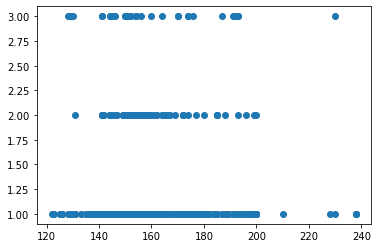

In [152]:
plt.scatter(X[:,10],y)#Max scatter plot
plt.savefig('./max_nsp_scatterplot.png')
plt.show()


# B.Discretization

## Using K-means(Clustering analysis). 

In [153]:
kbeans_discretization=KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
kbins_discreted_data =kbeans_discretization.fit_transform(X)
kb_discreted_df = DataFrame(kbins_discreted_data)

C:\Users\marko\anaconda3\envs\da_project\lib\site-packages\sklearn\preprocessing\_discretization.py:209: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
C:\Users\marko\anaconda3\envs\da_project\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 17 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


In [154]:
kb_discreted_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,1.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0
4,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0


## Binning.

### Discrete only MSTV column as it is a continue value. 

In [155]:
bins = [0,1,2,3,4,5]#after testing ,6 bins are ideal.
labels = [1,2,3,4,5]
new_df['binned_MSTV'] = pd.cut(new_df['MSTV'], bins=bins, labels=labels)

In [156]:
new_df['binned_MSTV'].value_counts()

1    236
2    210
3     61
4     14
5      4
Name: binned_MSTV, dtype: int64

In [157]:
new_df.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,Width,...,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,binned_MSTV
1332,128.0,5.0,6.0,2.0,30.0,1.9,0.0,3.8,3.0,141.0,...,12.0,0.0,137.0,127.0,136.0,49.0,0.0,6.0,1.0,2
1991,135.0,5.0,0.0,1.0,58.0,1.1,0.0,4.3,0.0,53.0,...,3.0,0.0,141.0,143.0,145.0,8.0,0.0,2.0,1.0,2
282,118.0,3.0,0.0,6.0,41.0,2.5,0.0,5.8,2.0,119.0,...,6.0,0.0,123.0,122.0,124.0,19.0,0.0,2.0,1.0,3
1182,126.0,4.0,0.0,4.0,30.0,1.2,0.0,4.2,0.0,49.0,...,3.0,0.0,127.0,134.0,134.0,11.0,0.0,2.0,1.0,2
356,140.0,0.0,4.0,0.0,61.0,0.9,16.0,12.4,3.0,129.0,...,9.0,1.0,142.0,138.0,141.0,11.0,0.0,7.0,2.0,1


## Normalization/Standarization 

### Using Standard Scaler 

In [158]:
df_sndscaler_normalized = DataFrame(StandardScaler().fit_transform(X))

In [159]:
df_sndscaler_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.178368,0.717159,0.070925,-0.605042,-0.883736,0.778267,-0.533010,-0.793678,2.131782,-1.706586,1.934595,2.980118,-0.454926,0.330071,-0.284775,0.173562,3.360260,0.392232
1,0.563989,0.717159,-0.207644,-0.953339,0.611536,-0.215567,-0.533010,-0.697695,-0.183248,0.346357,0.114795,-0.155975,-0.454926,0.627815,0.841454,0.878704,-0.158572,0.392232
2,-1.238878,0.111353,-0.207644,0.788146,-0.296308,1.523643,-0.533010,-0.409746,1.553024,-1.896673,0.489460,0.889389,-0.454926,-0.712034,-0.636722,-0.766627,0.785505,0.392232
3,-0.390470,0.414256,-0.207644,0.091552,-0.883736,-0.091338,-0.533010,-0.716891,-0.288477,0.194287,-0.313393,-0.155975,-0.454926,-0.414290,0.207950,0.016864,0.098903,0.392232
4,1.094244,-0.797357,-0.021932,-1.301636,0.771743,-0.464026,0.337718,0.857227,1.816096,-1.440463,1.666977,1.934753,1.410981,0.702251,0.489508,0.565307,0.098903,0.392232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,-0.814674,-0.494453,-0.207644,0.091552,-0.990541,0.157120,-0.533010,0.108561,-0.209555,-0.490027,-1.116246,-0.155975,-0.454926,-0.563162,-0.777500,-0.844976,-0.072747,0.392232
521,-0.284419,0.414256,-0.207644,0.091552,-0.670126,-0.339797,-0.533010,-0.352157,-0.156941,0.460410,0.328889,-0.852884,-0.454926,-0.116546,0.348729,0.016864,0.442204,-2.549510
522,1.942652,0.717159,-0.207644,0.788146,-1.043944,0.281350,-0.097646,0.972407,-0.262170,1.030671,0.917648,-0.155975,-0.454926,1.818791,1.615737,1.818893,-0.330223,0.392232
523,0.033734,-0.494453,-0.207644,0.091552,0.237718,-0.836714,1.534968,-0.601712,-0.972463,0.878602,-0.741581,-0.852884,-0.454926,0.106763,0.278340,0.173562,-0.759348,0.392232


### Using MinMax Scaler. 

In [160]:
min_max_normalization = MinMaxScaler()
min_max_normalization.fit(X)
normalized_df=DataFrame(min_max_normalization.transform(X))

In [161]:
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.488889,0.263158,0.022059,0.086957,0.229730,0.354167,0.000000,0.074951,0.773256,0.071429,0.655172,0.666667,0.000000,0.718310,0.644737,0.671875,1.000000,1.0
1,0.644444,0.263158,0.000000,0.043478,0.608108,0.187500,0.000000,0.084813,0.261628,0.622449,0.362069,0.166667,0.000000,0.774648,0.855263,0.812500,0.163265,1.0
2,0.266667,0.157895,0.000000,0.260870,0.378378,0.479167,0.000000,0.114398,0.645349,0.020408,0.422414,0.333333,0.000000,0.521127,0.578947,0.484375,0.387755,1.0
3,0.444444,0.210526,0.000000,0.173913,0.229730,0.208333,0.000000,0.082840,0.238372,0.581633,0.293103,0.166667,0.000000,0.577465,0.736842,0.640625,0.224490,1.0
4,0.755556,0.000000,0.014706,0.000000,0.648649,0.145833,0.175824,0.244576,0.703488,0.142857,0.612069,0.500000,0.333333,0.788732,0.789474,0.750000,0.224490,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,0.355556,0.052632,0.000000,0.173913,0.202703,0.250000,0.000000,0.167653,0.255814,0.397959,0.163793,0.166667,0.000000,0.549296,0.552632,0.468750,0.183673,1.0
521,0.466667,0.210526,0.000000,0.173913,0.283784,0.166667,0.000000,0.120316,0.267442,0.653061,0.396552,0.055556,0.000000,0.633803,0.763158,0.640625,0.306122,0.0
522,0.933333,0.263158,0.000000,0.260870,0.189189,0.270833,0.087912,0.256410,0.244186,0.806122,0.491379,0.166667,0.000000,1.000000,1.000000,1.000000,0.122449,1.0
523,0.533333,0.052632,0.000000,0.173913,0.513514,0.083333,0.417582,0.094675,0.087209,0.765306,0.224138,0.055556,0.000000,0.676056,0.750000,0.671875,0.020408,1.0


# Reduce the size and the dimensions of the data. 

In [162]:
len(new_df) #the lenght of the dataset after the preprocessing

525

In [163]:
new_df.shape[1] #number of columns(dimensions) of the new processed dataset(including binned_MSTV).

22